# IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


## READING DATASET

In [ ]:
df = pd.read_csv('drive/MyDrive/MACHINE LEARNING/dcrime_main.csv')
df.head(2)

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,6.0,6C,1.0,104.0,Cluster 25,010600 2,10600.0,Precinct 83,38.901916,-76.999516,NaN,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,6.0,6C,5.0,506.0,Cluster 25,010600 1,10600.0,Precinct 83,38.905024,-76.995538,NaN,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031


## DATA SUMMARIZATION

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
REPORT_DAT,311761,302861,2013-09-16T00:00:00.000Z,12
SHIFT,311761,3,EVENING,134118
METHOD,311761,3,OTHERS,284690
OFFENSE,311761,9,THEFT/OTHER,122521
BLOCK,311761,15086,3100 - 3299 BLOCK OF 14TH STREET NW,2296
ANC,310071,40,1B,18534
NEIGHBORHOOD_CLUSTER,307228,46,Cluster 2,24693
BLOCK_GROUP,309392,585,005800 1,8059
VOTING_PRECINCT,310024,144,Precinct 129,14303
BID,52686,11,DOWNTOWN,17342


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,311761.0,1.558800e+05,8.999779e+04,0.000000e+00,7.794000e+04,1.558800e+05,2.338200e+05,3.117600e+05
X,311761.0,-7.700799e+01,3.602332e-02,-7.711414e+01,-7.703195e+01,-7.701284e+01,-7.698552e+01,-7.691001e+01
Y,311761.0,3.890692e+01,3.062902e-02,3.881348e+01,3.889268e+01,3.890660e+01,3.892506e+01,3.899491e+01
CCN,311761.0,1.612814e+07,2.775309e+06,5.370000e+03,1.404203e+07,1.605907e+07,1.901531e+07,9.925858e+07
XBLOCK,311761.0,3.993080e+05,3.124339e+03,3.901033e+05,3.972290e+05,3.988870e+05,4.012570e+05,4.078068e+05
YBLOCK,311761.0,1.376737e+05,3.400203e+03,1.273000e+05,1.360930e+05,1.376380e+05,1.396860e+05,1.474410e+05
WARD,310063.0,4.421579e+00,2.337419e+00,1.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00
DISTRICT,311555.0,3.697466e+00,1.931023e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00
PSA,311538.0,3.743712e+02,1.928619e+02,1.010000e+02,2.070000e+02,3.080000e+02,5.060000e+02,7.080000e+02
CENSUS_TRACT,309392.0,6.327156e+03,1.023804e+04,1.000000e+02,3.500000e+03,7.000000e+03,8.904000e+03,9.800000e+05


In [ ]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD',
       'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID'],
      dtype='object')

In [ ]:
df.shape

(311761, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311761 entries, 0 to 311760
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            311761 non-null  int64  
 1   X                     311761 non-null  float64
 2   Y                     311761 non-null  float64
 3   CCN                   311761 non-null  int64  
 4   REPORT_DAT            311761 non-null  object 
 5   SHIFT                 311761 non-null  object 
 6   METHOD                311761 non-null  object 
 7   OFFENSE               311761 non-null  object 
 8   BLOCK                 311761 non-null  object 
 9   XBLOCK                311761 non-null  float64
 10  YBLOCK                311761 non-null  float64
 11  WARD                  310063 non-null  float64
 12  ANC                   310071 non-null  object 
 13  DISTRICT              311555 non-null  float64
 14  PSA                   311538 non-null  float64
 15  

## SEARCHING FOR NULL VALUES

In [ ]:
df.isnull().sum()

Unnamed: 0                   0
X                            0
Y                            0
CCN                          0
REPORT_DAT                   0
SHIFT                        0
METHOD                       0
OFFENSE                      0
BLOCK                        0
XBLOCK                       0
YBLOCK                       0
WARD                      1698
ANC                       1690
DISTRICT                   206
PSA                        223
NEIGHBORHOOD_CLUSTER      4533
BLOCK_GROUP               2369
CENSUS_TRACT              2369
VOTING_PRECINCT           1737
LATITUDE                     0
LONGITUDE                    0
BID                     259075
START_DATE                   8
END_DATE                 15507
OBJECTID                     0
dtype: int64

## IMPUTING MISSING VALUES

In [ ]:
df.dropna(subset=['WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'START_DATE', 'END_DATE'],how='any', inplace=True)

In [ ]:
df.drop(['BID'],axis=1,inplace=True)

In [ ]:
df.shape

(291069, 24)

In [ ]:
df.isnull().sum()

Unnamed: 0              0
X                       0
Y                       0
CCN                     0
REPORT_DAT              0
SHIFT                   0
METHOD                  0
OFFENSE                 0
BLOCK                   0
XBLOCK                  0
YBLOCK                  0
WARD                    0
ANC                     0
DISTRICT                0
PSA                     0
NEIGHBORHOOD_CLUSTER    0
BLOCK_GROUP             0
CENSUS_TRACT            0
VOTING_PRECINCT         0
LATITUDE                0
LONGITUDE               0
START_DATE              0
END_DATE                0
OBJECTID                0
dtype: int64

## CHECK DUPLICATES

In [ ]:
df.duplicated().sum()

0

## REMOVING UNWANTED PARTS FROM STRINGS IN A COLUMN


In [ ]:
df['VOTING_PRECINCT']

0          Precinct 83
1          Precinct 83
3         Precinct 134
4          Precinct 92
5           Precinct 5
              ...     
311756     Precinct 13
311757      Precinct 6
311758      Precinct 1
311759      Precinct 7
311760     Precinct 54
Name: VOTING_PRECINCT, Length: 291069, dtype: object

In [ ]:
df['VOTING_PRECINCT'] =df['VOTING_PRECINCT'].str.replace("Precinct ","")
df.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,6.0,6C,1.0,104.0,Cluster 25,010600 2,10600.0,83,38.901916,-76.999516,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,6.0,6C,5.0,506.0,Cluster 25,010600 1,10600.0,83,38.905024,-76.995538,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031
3,3,-76.967571,38.855724,11141272,2012-06-25T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,2800 - 2899 BLOCK OF BUENA VISTA TERRACE SE,402815.0,131990.0,8.0,8B,7.0,702.0,Cluster 36,007502 2,7502.0,134,38.855717,-76.967568,2011-09-26T06:45:00.000Z,2011-09-26T06:55:00.000Z,167296016
4,4,-76.939620,38.910718,11158196,2012-01-05T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,4280 - 4499 BLOCK OF DOUGLAS STREET NE,405237.0,138096.0,7.0,7D,6.0,601.0,Cluster 29,009601 1,9601.0,92,38.910711,-76.939618,2011-10-27T18:35:00.000Z,2011-10-27T00:00:00.000Z,167299077
5,5,-77.063647,38.909852,12005414,2012-01-11T18:52:00.000Z,EVENING,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF 32ND STREET NW,394480.0,138000.0,2.0,2E,2.0,206.0,Cluster 4,000100 3,100.0,5,38.909844,-77.063644,2012-01-11T13:00:00.000Z,2012-01-11T13:46:00.000Z,167301753


In [ ]:
df['NEIGHBORHOOD_CLUSTER']

0         Cluster 25
1         Cluster 25
3         Cluster 36
4         Cluster 29
5          Cluster 4
             ...    
311756     Cluster 1
311757     Cluster 4
311758     Cluster 8
311759    Cluster 13
311760    Cluster 18
Name: NEIGHBORHOOD_CLUSTER, Length: 291069, dtype: object

In [ ]:
df['NEIGHBORHOOD_CLUSTER'] =df['NEIGHBORHOOD_CLUSTER'].str.replace("Cluster ","")

In [ ]:
df.head(2)

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,6.0,6C,1.0,104.0,25,010600 2,10600.0,83,38.901916,-76.999516,2009-05-31T23:00:00.000Z,2009-06-01T06:00:00.000Z,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,6.0,6C,5.0,506.0,25,010600 1,10600.0,83,38.905024,-76.995538,2010-08-27T02:30:00.000Z,2010-08-27T07:15:00.000Z,167274031


## DATA VISUALIZATION

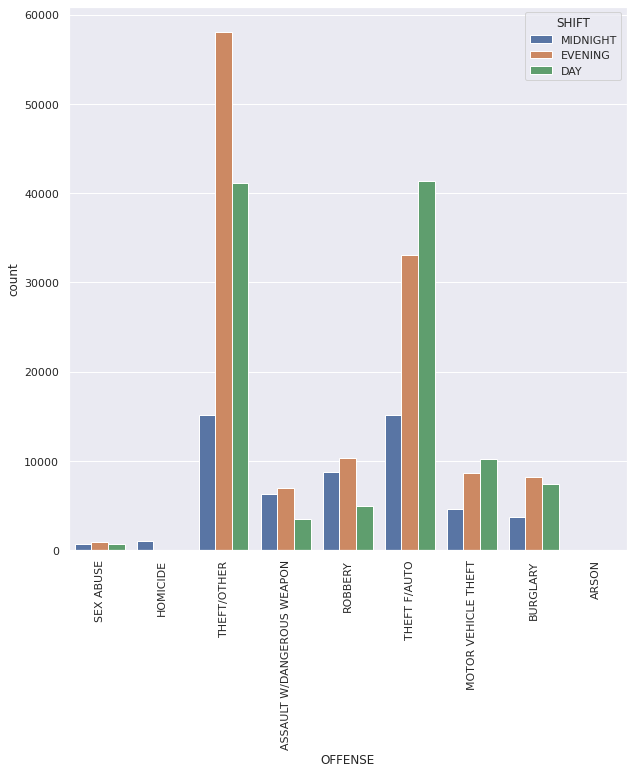

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(x = 'OFFENSE',hue='SHIFT', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OFFENSE'].value_counts()

THEFT/OTHER                   114343
THEFT F/AUTO                   89709
ROBBERY                        23940
MOTOR VEHICLE THEFT            23495
BURGLARY                       19280
ASSAULT W/DANGEROUS WEAPON     16744
SEX ABUSE                       2337
HOMICIDE                        1078
ARSON                            143
Name: OFFENSE, dtype: int64

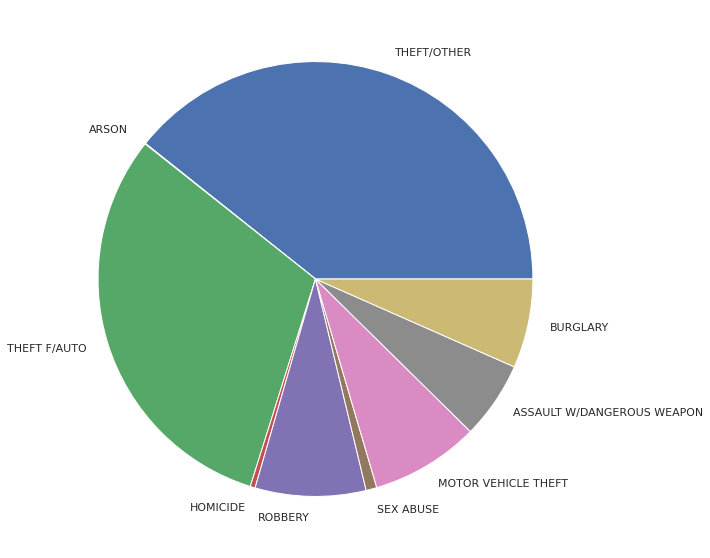

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
data = df['OFFENSE'].value_counts()
x = ['THEFT/OTHER', 'ARSON', 'THEFT F/AUTO','HOMICIDE', 'ROBBERY', 'SEX ABUSE', 'MOTOR VEHICLE THEFT',
     'ASSAULT W/DANGEROUS WEAPON','BURGLARY']

y = [114343, 143, 89709, 1078, 23940, 2337, 23495, 16744, 19280]
plt.pie(y, labels=x)
plt.show()

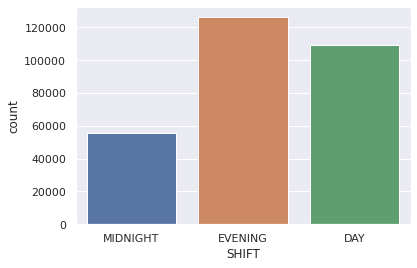

In [ ]:
sns.countplot(x='SHIFT', data=df)

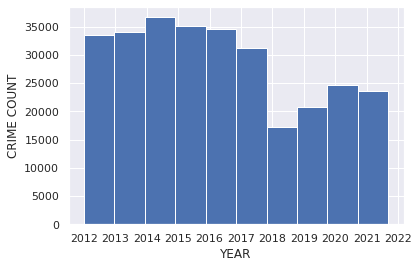

In [ ]:
pd.to_datetime(df['REPORT_DAT']).hist()
plt.xlabel('YEAR')
plt.ylabel('CRIME COUNT')
plt.show()

In [ ]:
df['OFFENSE'].unique()

array(['SEX ABUSE', 'HOMICIDE', 'THEFT/OTHER',
       'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY', 'THEFT F/AUTO',
       'MOTOR VEHICLE THEFT', 'BURGLARY', 'ARSON'], dtype=object)

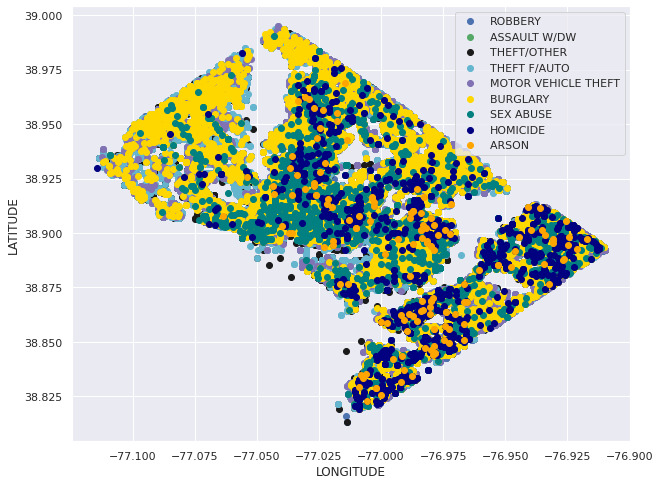

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ROBBERY'], df['LATITUDE'][df['OFFENSE']=='ROBBERY'], color='b', label='ROBBERY')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ASSAULT W/DW'], df['LATITUDE'][df['OFFENSE']=='ASSAULT W/DW'], color='g', label='ASSAULT W/DW')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='THEFT/OTHER'], df['LATITUDE'][df['OFFENSE']=='THEFT/OTHER'], color='k', label='THEFT/OTHER ')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='THEFT F/AUTO'], df['LATITUDE'][df['OFFENSE']=='THEFT F/AUTO'], color='c', label='THEFT F/AUTO')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='MOTOR VEHICLE THEFT'], df['LATITUDE'][df['OFFENSE']=='MOTOR VEHICLE THEFT'], color='m', label='MOTOR VEHICLE THEFT')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='BURGLARY'], df['LATITUDE'][df['OFFENSE']=='BURGLARY'], color='gold', label='BURGLARY ')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='SEX ABUSE'], df['LATITUDE'][df['OFFENSE']=='SEX ABUSE'], color='teal', label='SEX ABUSE')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='HOMICIDE'], df['LATITUDE'][df['OFFENSE']=='HOMICIDE'], color='navy', label='HOMICIDE')
plt.scatter(df['LONGITUDE'][df['OFFENSE']=='ARSON'], df['LATITUDE'][df['OFFENSE']=='ARSON'], color='orange', label='ARSON ')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.legend(loc='upper right')
plt.show()

## DATATYPE CONVERSION

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 291069 entries, 0 to 311760
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            291069 non-null  int64  
 1   X                     291069 non-null  float64
 2   Y                     291069 non-null  float64
 3   CCN                   291069 non-null  int64  
 4   REPORT_DAT            291069 non-null  object 
 5   SHIFT                 291069 non-null  object 
 6   METHOD                291069 non-null  object 
 7   OFFENSE               291069 non-null  object 
 8   BLOCK                 291069 non-null  object 
 9   XBLOCK                291069 non-null  float64
 10  YBLOCK                291069 non-null  float64
 11  WARD                  291069 non-null  float64
 12  ANC                   291069 non-null  object 
 13  DISTRICT              291069 non-null  float64
 14  PSA                   291069 non-null  float64
 15  

In [ ]:
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'])
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [ ]:
df['SHIFT'].unique()

array(['MIDNIGHT', 'EVENING', 'DAY'], dtype=object)

In [ ]:
shift_label = LabelEncoder()
df['SHIFT']= shift_label.fit_transform(df['SHIFT'])

In [ ]:
df['METHOD'].unique()

array(['OTHERS', 'GUN', 'KNIFE'], dtype=object)

In [ ]:
method_label = LabelEncoder()
df['METHOD']= method_label.fit_transform(df['METHOD'])

In [ ]:
df.head(2)

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25 00:00:00+00:00,2,2,SEX ABUSE,900 - 999 BLOCK OF 5TH STREET NE,400042.0,137118.0,6.0,6C,1.0,104.0,25,010600 2,10600.0,83,38.901916,-76.999516,2009-05-31 23:00:00+00:00,2009-06-01 06:00:00+00:00,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29 00:00:00+00:00,2,2,SEX ABUSE,700 - 799 BLOCK OF FLORIDA AVENUE NE,400387.0,137463.0,6.0,6C,5.0,506.0,25,010600 1,10600.0,83,38.905024,-76.995538,2010-08-27 02:30:00+00:00,2010-08-27 07:15:00+00:00,167274031


In [ ]:
df['OFFENSE'].unique()

array(['SEX ABUSE', 'HOMICIDE', 'THEFT/OTHER',
       'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY', 'THEFT F/AUTO',
       'MOTOR VEHICLE THEFT', 'BURGLARY', 'ARSON'], dtype=object)

In [ ]:
offense_label = LabelEncoder()
df['OFFENSE']= offense_label.fit_transform(df['OFFENSE'])

In [ ]:
offense_label.classes_

array(['ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER'], dtype=object)

In [ ]:
block_label = LabelEncoder()
df['BLOCK']= block_label.fit_transform(df['BLOCK'])

In [ ]:
df['ANC'].unique()

array(['6C', '8B', '7D', '2E', '7F', '5A', '4C', '2B', '8E', '2D', '4D',
       '6B', '7B', '3E', '6A', '2F', '5D', '5E', '5C', '4A', '1B', '5B',
       '1A', '8A', '8C', '1D', '4B', '7C', '6D', '2C', '3F', '3G', '7E',
       '8D', '6E', '3C', '1C', '2A', '3D', '3B'], dtype=object)

In [ ]:
anc_label = LabelEncoder()
df['ANC']= anc_label.fit_transform(df['ANC'])

In [ ]:
df['NEIGHBORHOOD_CLUSTER'] = df['NEIGHBORHOOD_CLUSTER'].astype(np.int64)

In [ ]:
block_label = LabelEncoder()
df['BLOCK_GROUP']= block_label.fit_transform(df['BLOCK_GROUP'])

In [ ]:
df['VOTING_PRECINCT'] = df['VOTING_PRECINCT'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291069 entries, 0 to 311760
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Unnamed: 0            291069 non-null  int64              
 1   X                     291069 non-null  float64            
 2   Y                     291069 non-null  float64            
 3   CCN                   291069 non-null  int64              
 4   REPORT_DAT            291069 non-null  datetime64[ns, UTC]
 5   SHIFT                 291069 non-null  int64              
 6   METHOD                291069 non-null  int64              
 7   OFFENSE               291069 non-null  int64              
 8   BLOCK                 291069 non-null  int64              
 9   XBLOCK                291069 non-null  float64            
 10  YBLOCK                291069 non-null  float64            
 11  WARD                  291069 non-null  float64      

## REMOVING DUPLICATE AND UNWANTED COLUMNS

In [ ]:
df.columns

Index(['Unnamed: 0', 'X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD',
       'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT',
       'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'START_DATE', 'END_DATE',
       'OBJECTID'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,START_DATE,END_DATE,OBJECTID
0,0,-76.999518,38.901924,9074624,2012-04-25 00:00:00+00:00,2,2,6,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516,2009-05-31 23:00:00+00:00,2009-06-01 06:00:00+00:00,167253019
1,1,-76.995541,38.905032,10123633,2012-02-29 00:00:00+00:00,2,2,6,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538,2010-08-27 02:30:00+00:00,2010-08-27 07:15:00+00:00,167274031
3,3,-76.967571,38.855724,11141272,2012-06-25 00:00:00+00:00,2,2,3,5545,402815.0,131990.0,8.0,36,7.0,702.0,36,357,7502.0,134,38.855717,-76.967568,2011-09-26 06:45:00+00:00,2011-09-26 06:55:00+00:00,167296016
4,4,-76.939620,38.910718,11158196,2012-01-05 00:00:00+00:00,2,2,3,8472,405237.0,138096.0,7.0,32,6.0,601.0,29,488,9601.0,92,38.910711,-76.939618,2011-10-27 18:35:00+00:00,2011-10-27 00:00:00+00:00,167299077
5,5,-77.063647,38.909852,12005414,2012-01-11 18:52:00+00:00,1,2,8,2351,394480.0,138000.0,2.0,8,2.0,206.0,4,2,100.0,5,38.909844,-77.063644,2012-01-11 13:00:00+00:00,2012-01-11 13:46:00+00:00,167301753


In [ ]:
df.drop(['Unnamed: 0','X','Y','OBJECTID','START_DATE', 'END_DATE','CCN'], inplace=True, axis=1)

In [ ]:
df.head(2)

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2012-04-25 00:00:00+00:00,2,2,6,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516
1,2012-02-29 00:00:00+00:00,2,2,6,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538


## SAVING CLEANED DATASET

In [ ]:
df.to_csv('clean_dc_crime.csv')

## LOAD CLEANED DATASET

In [ ]:
%cd drive/MyDrive/MACHINE\ LEARNING/

/content/drive/MyDrive/MACHINE LEARNING


In [ ]:
!ls

catboost_info  clean_dc_crime.csv  dcrime_main.csv


In [ ]:
df = pd.read_csv('clean_dc_crime.csv')
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
df.head()

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2012-04-25 00:00:00+00:00,2,2,6,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516
1,2012-02-29 00:00:00+00:00,2,2,6,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538
2,2012-06-25 00:00:00+00:00,2,2,3,5545,402815.0,131990.0,8.0,36,7.0,702.0,36,357,7502.0,134,38.855717,-76.967568
3,2012-01-05 00:00:00+00:00,2,2,3,8472,405237.0,138096.0,7.0,32,6.0,601.0,29,488,9601.0,92,38.910711,-76.939618
4,2012-01-11 18:52:00+00:00,1,2,8,2351,394480.0,138000.0,2.0,8,2.0,206.0,4,2,100.0,5,38.909844,-77.063644


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291069 entries, 0 to 291068
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   REPORT_DAT            291069 non-null  object 
 1   SHIFT                 291069 non-null  int64  
 2   METHOD                291069 non-null  int64  
 3   OFFENSE               291069 non-null  int64  
 4   BLOCK                 291069 non-null  int64  
 5   XBLOCK                291069 non-null  float64
 6   YBLOCK                291069 non-null  float64
 7   WARD                  291069 non-null  float64
 8   ANC                   291069 non-null  int64  
 9   DISTRICT              291069 non-null  float64
 10  PSA                   291069 non-null  float64
 11  NEIGHBORHOOD_CLUSTER  291069 non-null  int64  
 12  BLOCK_GROUP           291069 non-null  int64  
 13  CENSUS_TRACT          291069 non-null  float64
 14  VOTING_PRECINCT       291069 non-null  int64  
 15  

In [ ]:
df['REPORT_DAT'] =  pd.to_datetime(df['REPORT_DAT'])
df.head(2)

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE
0,2012-04-25 00:00:00+00:00,2,2,6,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516
1,2012-02-29 00:00:00+00:00,2,2,6,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538


In [ ]:
df['MONTH'] = df['REPORT_DAT'].dt.month

In [ ]:
df['DAY'] = df['REPORT_DAT'].dt.day

In [ ]:
df['DAY OF WEEK'] = df['REPORT_DAT'].dt.dayofweek

In [ ]:
df.head()

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,MONTH,DAY,DAY OF WEEK
0,2012-04-25 00:00:00+00:00,2,2,6,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516,4,25,2
1,2012-02-29 00:00:00+00:00,2,2,6,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538,2,29,2
2,2012-06-25 00:00:00+00:00,2,2,3,5545,402815.0,131990.0,8.0,36,7.0,702.0,36,357,7502.0,134,38.855717,-76.967568,6,25,0
3,2012-01-05 00:00:00+00:00,2,2,3,8472,405237.0,138096.0,7.0,32,6.0,601.0,29,488,9601.0,92,38.910711,-76.939618,1,5,3
4,2012-01-11 18:52:00+00:00,1,2,8,2351,394480.0,138000.0,2.0,8,2.0,206.0,4,2,100.0,5,38.909844,-77.063644,1,11,2


In [ ]:
df['OFFENSES'] = df['OFFENSE']
df.drop(['OFFENSE'], inplace=True, axis=1)

In [ ]:
df.head(2)

,REPORT_DAT,SHIFT,METHOD,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,MONTH,DAY,DAY OF WEEK,OFFENSES
0,2012-04-25 00:00:00+00:00,2,2,12403,400042.0,137118.0,6.0,27,1.0,104.0,25,553,10600.0,83,38.901916,-76.999516,4,25,2,6
1,2012-02-29 00:00:00+00:00,2,2,11630,400387.0,137463.0,6.0,27,5.0,506.0,25,552,10600.0,83,38.905024,-76.995538,2,29,2,6


In [ ]:
df.shape

(291069, 20)

In [ ]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 0)

In [ ]:
x_train, Y_train = X_train, y_train
x_test, Y_test = X_test, y_test
x_train.shape, Y_train.shape, x_test.shape, Y_test.shape

((232855, 18), (232855,), (58214, 18), (58214,))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((232855, 18), (232855,), (58214, 18), (58214,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,stratify=y_train, random_state = 0)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((186284, 18), (186284,), (46571, 18), (46571,))

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [ ]:
sc1 = StandardScaler()
x_train = sc1.fit_transform(x_train)
x_test = sc1.transform(x_test)

## LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_val)
print('Accuracy Score :', accuracy_score(y_val, lr_y_pred))

Accuracy  Score : 0.4424856670460158


In [ ]:
model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5, random_state=None)

solvers = ['newton-cg', 'lbfgs','saga','sag']

grid = dict(solver = solvers)

grid_search = GridSearchCV(estimator=model, param_grid = grid, n_jobs=-1, cv=skf, scoring='accuracy',verbose=2)
grid_result = grid_search.fit(x_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 58.7min finished


Best: 0.443126 using {'solver': 'newton-cg'}


In [ ]:
lr = LogisticRegression(max_iter=1000, solver='newton-cg')
lr.fit(x_train, Y_train)
lr_y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(Y_test, lr_y_pred)
print('Accuracy Score :', lr_accuracy)
print('\nClassification Report\n',classification_report(Y_test, lr_y_pred))

Accuracy Score : 0.4429862232452675

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.50      0.26      0.34      3349
           2       0.00      0.00      0.00      3856
           3       0.00      0.00      0.00       216
           4       0.00      0.00      0.00      4699
           5       0.44      0.28      0.34      4788
           6       0.00      0.00      0.00       467
           7       0.41      0.26      0.32     17942
           8       0.45      0.83      0.58     22869

    accuracy                           0.44     58214
   macro avg       0.20      0.18      0.18     58214
weighted avg       0.37      0.44      0.37     58214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


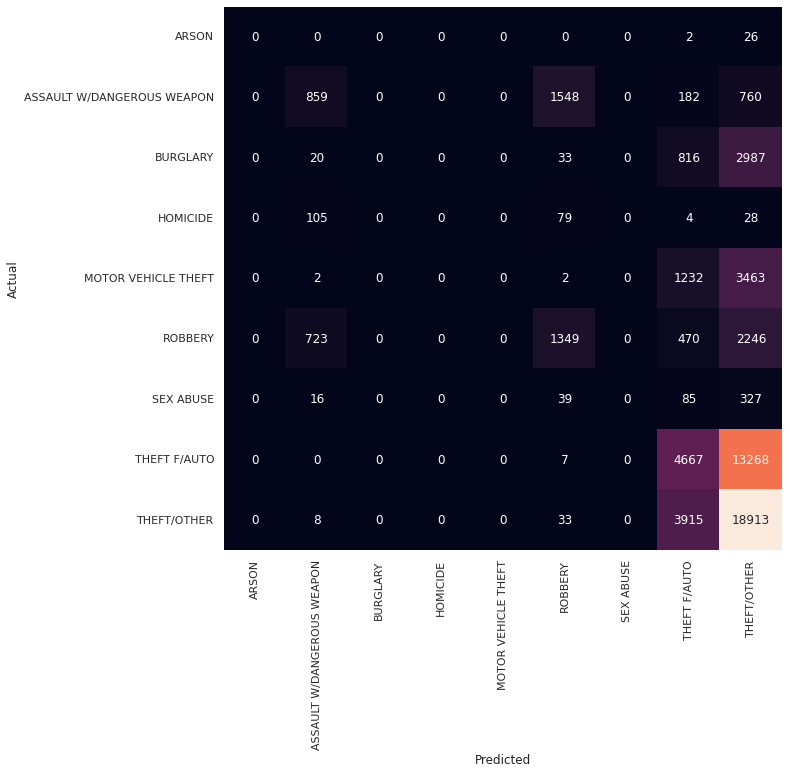

In [ ]:
cm = confusion_matrix(Y_test, lr_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# DECISION TREE CLASSIFIER

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_val)
accuracy_score(y_val, dtree_y_pred)

0.4425208685616126

In [ ]:
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
accuracies

Accuracy: 43.62 %


array([0.43192646, 0.44078373, 0.43467758, 0.43568409, 0.42917533,
       0.43910622, 0.44031403, 0.43880016, 0.44262515, 0.42927124])

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,3,5,8,10,12,14,16,20,50],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 50, 100],
      'min_samples_leaf': [1, 5, 8, 10]
    
}
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5, random_state=None)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = skf,  verbose = 2)

grid_result = grid_search.fit(x_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, total=   0.8s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, total=   0.7s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, total=   0.7s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, total=   0.7s
[CV] criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max

[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 47.1min finished


Best: 0.535346 using {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 100}


In [ ]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 100)
dtree.fit(x_train, Y_train)
dtree_y_pred = dtree.predict(x_test)
dtree_accuracy = accuracy_score(Y_test, dtree_y_pred)
print('Accuracy Score :', dtree_accuracy)
print('\nClassification Report\n',classification_report(Y_test, dtree_y_pred))

Accuracy Score : 0.5355069227333631

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.63      0.47      0.54      3349
           2       0.24      0.07      0.11      3856
           3       0.11      0.00      0.01       216
           4       0.25      0.06      0.10      4699
           5       0.53      0.30      0.39      4788
           6       0.00      0.00      0.00       467
           7       0.50      0.63      0.56     17942
           8       0.58      0.71      0.64     22869

    accuracy                           0.54     58214
   macro avg       0.32      0.25      0.26     58214
weighted avg       0.50      0.54      0.50     58214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


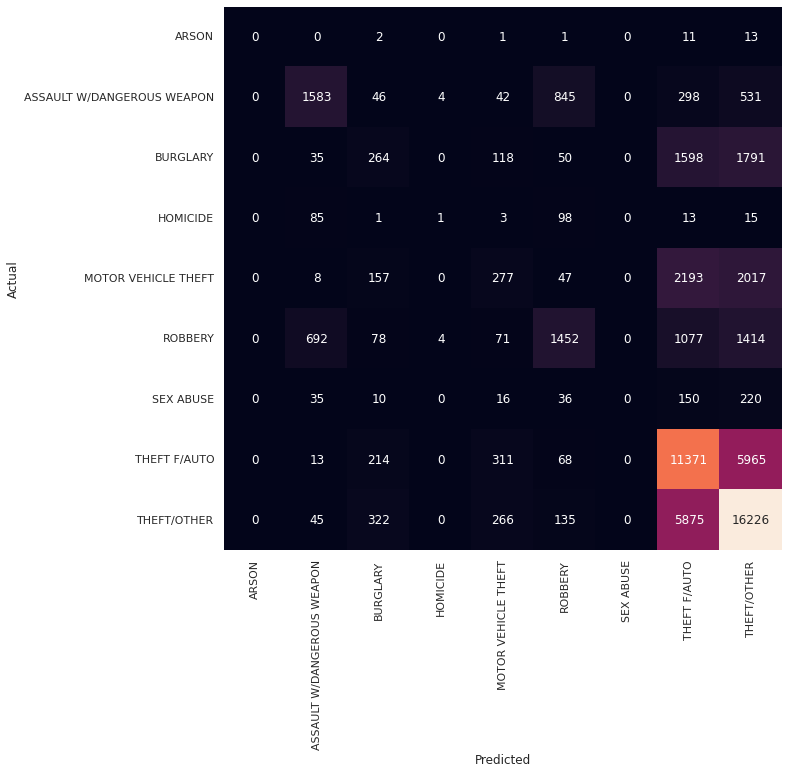

In [ ]:
cm = confusion_matrix(Y_test, dtree_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# RANDOM FOREST CLASSIFIER

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_val)
accuracy_score(y_val, forest_y_pred)

0.5323831763158601

In [ ]:
accuracies = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
accuracies

Accuracy: 52.98 %


array([0.53438188, 0.53100005, 0.52853079, 0.52670567, 0.53580631,
       0.52920335, 0.53118961, 0.52974018, 0.52651922, 0.5244256 ])

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion'   : ['gini', 'entropy'],
    'max_features': ['log2', 'sqrt','auto'], 
    
}

rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, random_state=None)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = skf,  verbose = 2)

grid_result = grid_search.fit(x_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_features=log2, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=log2, n_estimators=50, total=  31.9s
[CV] criterion=gini, max_features=log2, n_estimators=50 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.9s remaining:    0.0s


[CV]  criterion=gini, max_features=log2, n_estimators=50, total=  31.5s
[CV] criterion=gini, max_features=log2, n_estimators=50 ..............
[CV]  criterion=gini, max_features=log2, n_estimators=50, total=  31.1s
[CV] criterion=gini, max_features=log2, n_estimators=50 ..............
[CV]  criterion=gini, max_features=log2, n_estimators=50, total=  30.8s
[CV] criterion=gini, max_features=log2, n_estimators=50 ..............
[CV]  criterion=gini, max_features=log2, n_estimators=50, total=  31.5s
[CV] criterion=gini, max_features=log2, n_estimators=100 .............
[CV]  criterion=gini, max_features=log2, n_estimators=100, total= 1.0min
[CV] criterion=gini, max_features=log2, n_estimators=100 .............
[CV]  criterion=gini, max_features=log2, n_estimators=100, total= 1.1min
[CV] criterion=gini, max_features=log2, n_estimators=100 .............
[CV]  criterion=gini, max_features=log2, n_estimators=100, total= 1.0min
[CV] criterion=gini, max_features=log2, n_estimators=100 ..........

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 217.4min finished


Best: 0.536523 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features= 'sqrt')
forest.fit(x_train, Y_train)
forest_y_pred = forest.predict(x_test)
forest_accuracy = accuracy_score(Y_test, forest_y_pred)
print('Accuracy Score :', forest_accuracy)
print('\nClassification Report\n',classification_report(Y_test, forest_y_pred))

Accuracy Score : 0.5382897584773422

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.60      0.50      0.55      3349
           2       0.24      0.14      0.18      3856
           3       0.39      0.10      0.16       216
           4       0.20      0.11      0.14      4699
           5       0.47      0.34      0.40      4788
           6       0.13      0.03      0.05       467
           7       0.53      0.62      0.57     17942
           8       0.61      0.69      0.65     22869

    accuracy                           0.54     58214
   macro avg       0.35      0.28      0.30     58214
weighted avg       0.51      0.54      0.52     58214



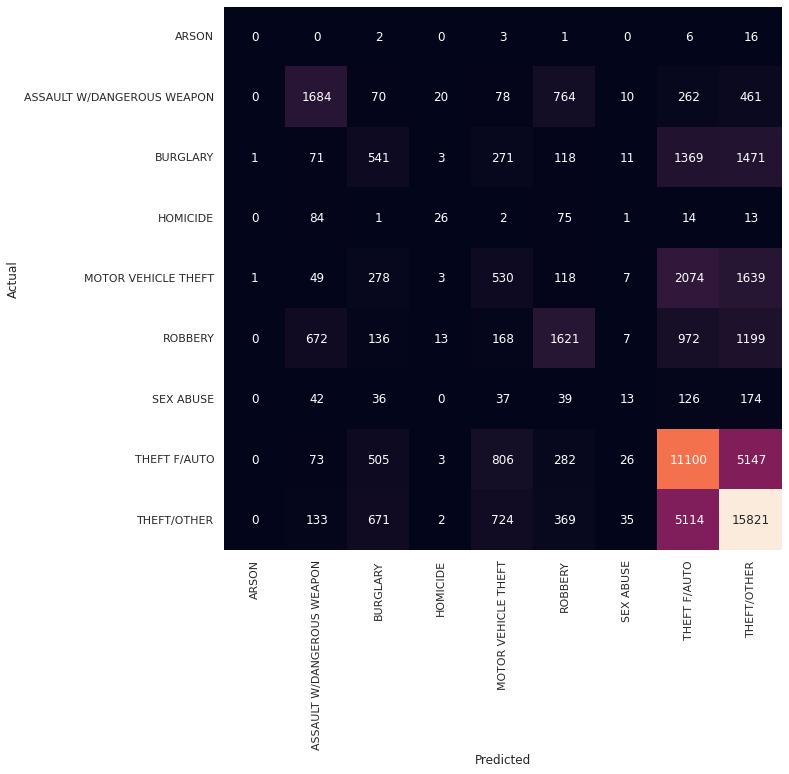

In [ ]:
cm = confusion_matrix(Y_test, forest_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# K NEAREST NEIGHBOUR

k : 1  Accuracy : 0.4077000708595478
k : 11  Accuracy : 0.47572523673530737
k : 21  Accuracy : 0.4880505035322411
k : 31  Accuracy : 0.4928174185652015
k : 41  Accuracy : 0.492452384531146
k : 51  Accuracy : 0.49232354898971464
k : 61  Accuracy : 0.4898327285220416
k : 71  Accuracy : 0.4897897833415645
k : 81  Accuracy : 0.49084194026325395
k : 91  Accuracy : 0.4897468381610874
k : 101  Accuracy : 0.4905413239999141


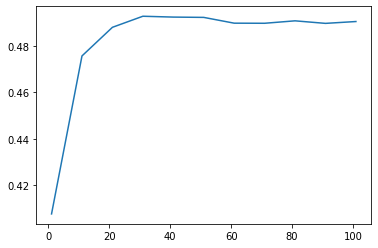

In [ ]:
k = []
acc = []
for i in range(1,102,10):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    k.append(i)
    acc.append(accuracy_score(y_val, y_pred))
    print('k :',i," Accuracy :",accuracy_score(y_val,y_pred))
plt.plot(k,acc)


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 31, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print('Accuracy Score :', knn_accuracy)
print('\nClassification Report\n',classification_report(y_test, knn_y_pred))

Accuracy Score : 0.49027725289449275

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.68      0.43      0.52      3349
           2       0.22      0.01      0.01      3856
           3       0.00      0.00      0.00       216
           4       0.21      0.02      0.03      4699
           5       0.58      0.31      0.41      4788
           6       0.00      0.00      0.00       467
           7       0.46      0.48      0.47     17942
           8       0.49      0.74      0.59     22869

    accuracy                           0.49     58214
   macro avg       0.29      0.22      0.23     58214
weighted avg       0.45      0.49      0.44     58214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


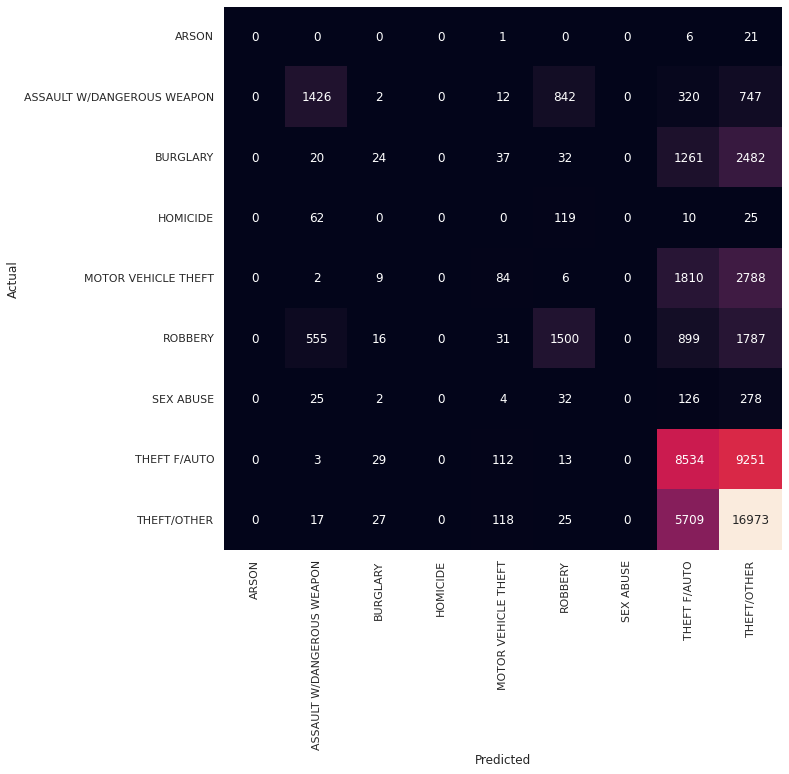

In [ ]:
cm = confusion_matrix(y_test, knn_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# SUPPORT VECTOR CLASSIFIER

In [ ]:
svc_l = SVC(kernel = 'linear', random_state = 0)
svc_l.fit(X_train, y_train)
y_pred = svc_l.predict(X_val)
accuracy_score(y_val, y_pred)

0.42910824332739256

In [ ]:
svc_l_y_pred = svc_l.predict(X_test)
svc_l_accuracy = accuracy_score(y_test, svc_l_y_pred)
print('Accuracy Score :', svc_l_accuracy)
print('\nClassification Report\n',classification_report(y_test, svc_l_y_pred))

Accuracy Score : 0.4280757206170337

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.80      0.01      0.01      3349
           2       0.00      0.00      0.00      3856
           3       0.00      0.00      0.00       216
           4       0.00      0.00      0.00      4699
           5       0.43      0.43      0.43      4788
           6       0.00      0.00      0.00       467
           7       0.56      0.00      0.00     17942
           8       0.43      1.00      0.60     22869

    accuracy                           0.43     58214
   macro avg       0.25      0.16      0.12     58214
weighted avg       0.42      0.43      0.27     58214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


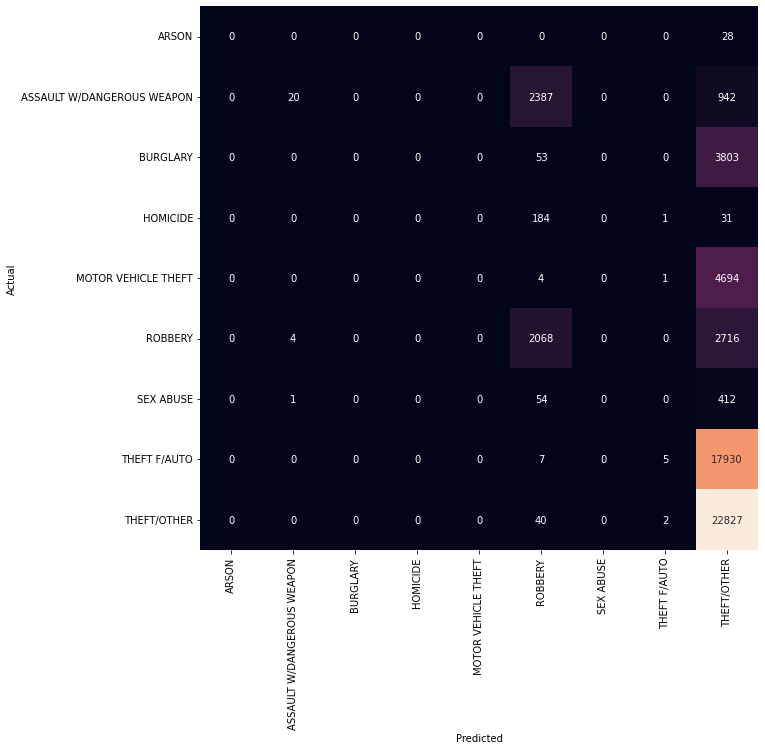

In [ ]:
cm = confusion_matrix(y_test, svc_l_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# NAIVE BAYES CLASSIFIER

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_val)
accuracy_score(y_val, nb_y_pred)

0.34304610165124216

In [ ]:
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 33.66 %


In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
skf = StratifiedKFold(n_splits=5, random_state=None)
nbModel_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=skf)
nbModel_grid.fit(x_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(priors=None, var_smoothing=1.0)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


In [ ]:
nb = GaussianNB(priors=None, var_smoothing=1.0)
nb.fit(x_train, Y_train)
nb_y_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(Y_test, nb_y_pred)
print('Accuracy Score :', nb_accuracy)
print('\nClassification Report\n',classification_report(Y_test, nb_y_pred))

Accuracy Score : 0.408956608375992

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.48      0.39      0.43      3349
           2       0.00      0.00      0.00      3856
           3       0.00      0.00      0.00       216
           4       0.17      0.36      0.23      4699
           5       0.56      0.21      0.30      4788
           6       0.00      0.00      0.00       467
           7       0.43      0.13      0.19     17942
           8       0.46      0.77      0.57     22869

    accuracy                           0.41     58214
   macro avg       0.23      0.21      0.19     58214
weighted avg       0.40      0.41      0.35     58214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


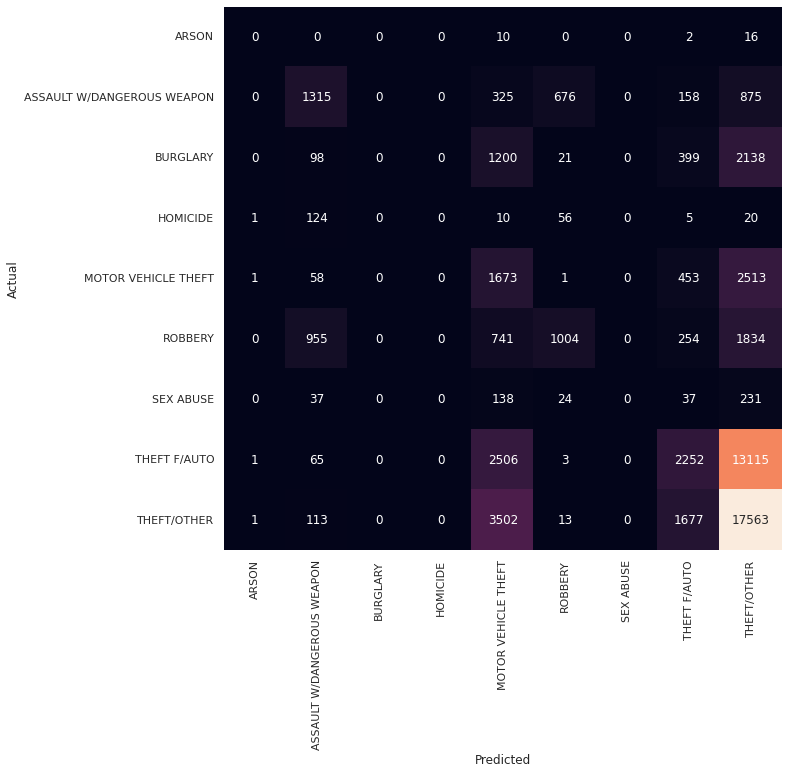

In [ ]:
cm = confusion_matrix(Y_test, nb_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# K-MEANS CLUSTERING

In [ ]:

data = df.iloc[:,[14,15]].values

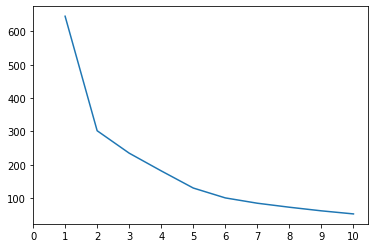

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state = 42, init= "k-means++")
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(np.arange(0, 11, 1))
plt.show()

In [ ]:
km = KMeans(n_clusters=6, random_state = 42, init= "k-means++")
y_kmeans = km.fit_predict(data)


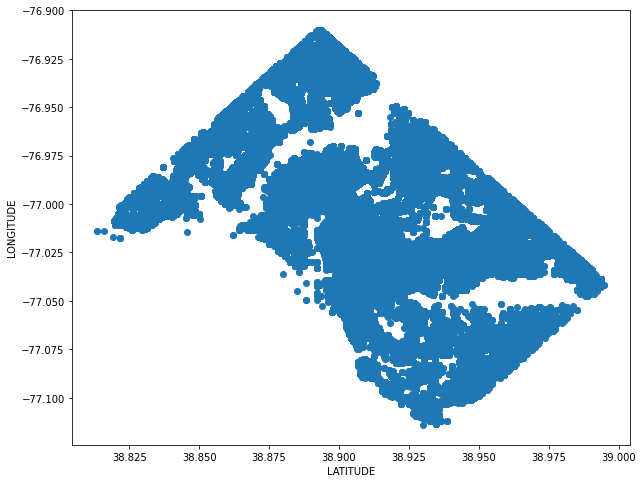

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter( df['LATITUDE'],df['LONGITUDE'])
plt.ylabel('LONGITUDE')
plt.xlabel('LATITUDE')
plt.show()

In [ ]:
km.cluster_centers_

array([[ 38.94105985, -77.07505755],
       [ 38.85614984, -76.98875716],
       [ 38.90714681, -76.99026639],
       [ 38.91211772, -77.03362683],
       [ 38.89168382, -76.93920093],
       [ 38.95255702, -77.02139768]])

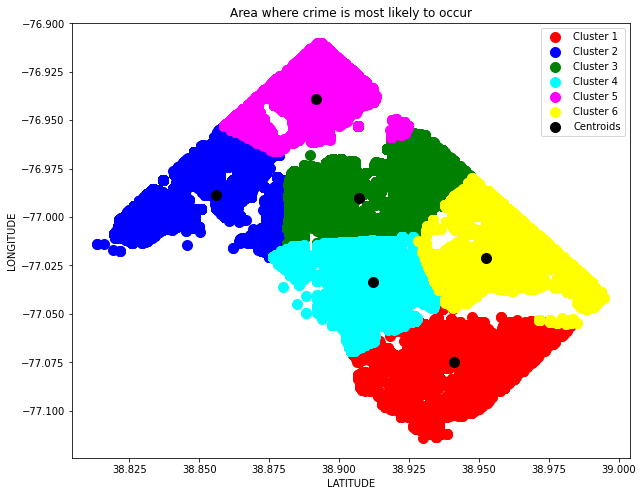

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[y_kmeans == 5, 0], data[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Area where crime is most likely to occur')
plt.ylabel('LONGITUDE')
plt.xlabel('LATITUDE')
plt.legend()
plt.show()

# NAIVE BAYES IMPLEMENTATION

In [ ]:
import warnings
from tqdm import tqdm 
warnings.filterwarnings("ignore")

In [ ]:
a = np.array([[1,2,3],
              [4,8,6]])
print(a.mean(axis=0))
print(a.var(axis=0))
np.concatenate((a.mean(axis=0).reshape(-1,1),a.var(axis=0).reshape(-1,1)),axis=1)

[2.5 5.  4.5]
[2.25 9.   2.25]


array([[2.5 , 2.25],
       [5.  , 9.  ],
       [4.5 , 2.25]])

In [ ]:
import math

class NaiveBayes():
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def likelihood(self, mean, var, x):
        m = 0.01
        gaussian = (1.0 / math.sqrt(2.0 * math.pi * var + m))*(math.exp(-(math.pow(x - mean, 2) / (2 * var + m))))
        return gaussian

    def prior(self, target):
        return np.mean(self.y == target)

    def predict(self, X):
        y_pred = []
        for j in tqdm(X):
            posteriors = []
            for i, c in enumerate(self.classes):
                posterior = self.prior(c)
                for feature_value, params in zip(j, self.parameters[i]):
                    likelihood = self.likelihood(params["mean"], params["var"], feature_value)
                    posterior *= likelihood
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

In [ ]:
nb = NaiveBayes()
nb.fit(X_train,y_train)
pred = nb.predict(X_val)
accuracy_score(y_val,pred)

100%|██████████| 46571/46571 [02:10<00:00, 356.59it/s]


0.3898134031908269

In [ ]:
nb_y_pred = nb.predict(X_test)

100%|██████████| 58214/58214 [02:42<00:00, 357.82it/s]


In [ ]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print('Accuracy Score :', nb_accuracy)
print('\nClassification Report\n',classification_report(y_test, nb_y_pred))

Accuracy Score : 0.39146940598481467

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.42      0.41      0.41      3349
           2       0.00      0.00      0.00      3856
           3       0.15      0.40      0.21       216
           4       0.15      0.43      0.23      4699
           5       0.51      0.20      0.29      4788
           6       0.00      0.00      0.00       467
           7       0.41      0.40      0.40     17942
           8       0.52      0.49      0.50     22869

    accuracy                           0.39     58214
   macro avg       0.24      0.26      0.23     58214
weighted avg       0.41      0.39      0.39     58214



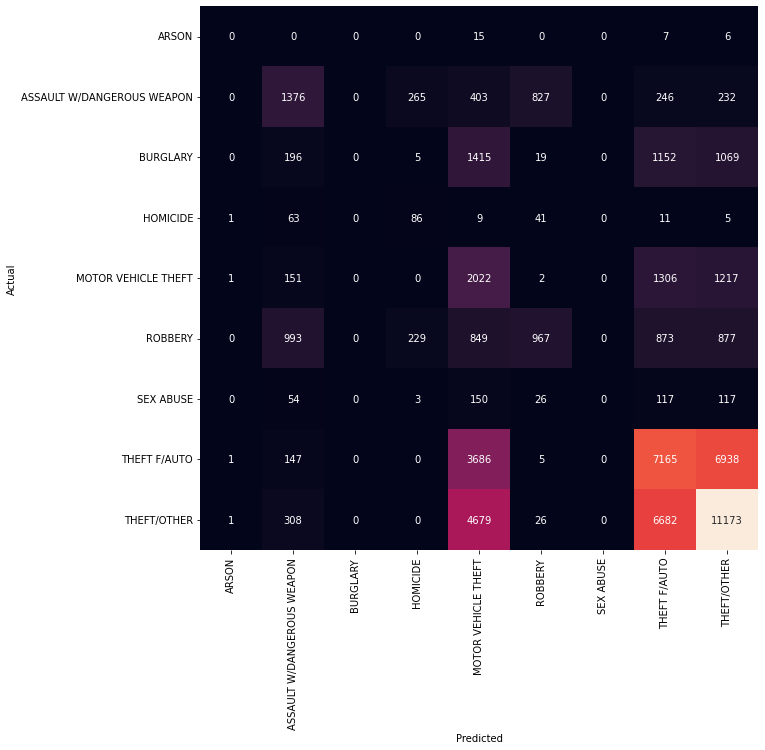

In [ ]:
cm = confusion_matrix(y_test, nb_y_pred)
df_cm = pd.DataFrame(cm, index = offense_label.classes_, columns = offense_label.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)

# COMPARISON GRAPH

In [ ]:
model = ['LOGISTIC REGRESSION','DECISION TREE','RANDOM FOREST','KNN','NAIVE BAYES','SVC', 'NAIVE BAYES (USING SCRATCH CODE)']
acc = np.array([0.4429862232452675,0.5355069227333631,0.5382897584773422,0.49027725289449275,0.408956608375992,0.4280757206170337,0.39146940598481467 ])
data = pd.DataFrame(acc*100, index = model, columns=['Accuracy'])
data

,Accuracy
LOGISTIC REGRESSION,44.298622
DECISION TREE,53.550692
RANDOM FOREST,53.828976
KNN,49.027725
NAIVE BAYES,40.895661
SVC,42.807572
NAIVE BAYES (USING SCRATCH CODE),39.146941


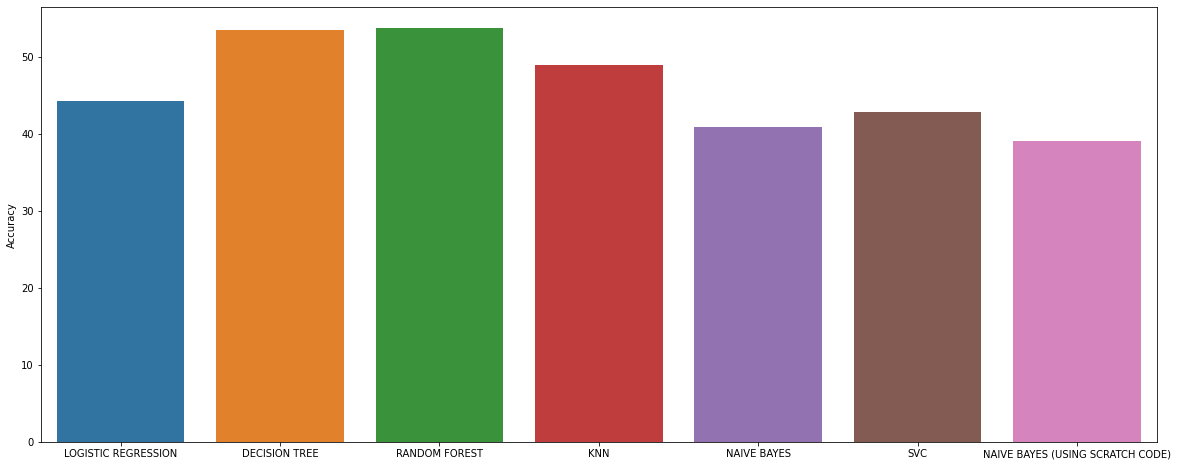

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=data, y='Accuracy',x=data.index,)